<a href="https://colab.research.google.com/github/rithika1910/Global_terrorism/blob/main/Global_terrorism_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GLOBAL TERRORISM - BINARY CLASSIFICATION**


The main objective of this case study is to classify the data available in the global terrorism database (GTD) as 'successful' or 'failure'. This is a binary classification problem. 

In [ ]:
gt = pd.read_csv('/content/drive/MyDrive/Global_Terrorism.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
gt = gt.loc[(gt.doubtterr == 0) & (gt.nkill >=0)]
gt.shape

(132137, 135)

In [ ]:
gt

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Assam,Hungrum,25.180162,93.015788,2.0,0,The incident occurred in the Dima Hasao distri...,12/31/2017: Assailants abducted Prafulla Phuka...,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,2,Government (General),15.0,Politician or Political Party 

In [ ]:
GT = gt[['iyear','imonth','extended','country_txt','region_txt','nkill','nwound','success','crit1','crit2','crit3','multiple',
     'vicinity', 'specificity','suicide','attacktype1_txt','weaptype1_txt','targtype1_txt','gname','propextent_txt','ishostkid','INT_ANY']]


In [ ]:
GT

,iyear,imonth,extended,country_txt,region_txt,nkill,nwound,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
0,1970,7,0,Dominican Republic,Central America & Caribbean,1.0,0.0,1,1,1,1,0.0,0,1.0,0,Assassination,Unknown,Private Citizens & Property,MANO-D,NaN,0.0,0
1,1970,0,0,Mexico,North America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),23rd of September Communist League,NaN,1.0,1
2,1970,1,0,Philippines,Southeast Asia,1.0,0.0,1,1,1,1,0.0,0,4.0,0,Assassination,Unknown,Journalists & Media,Unknown,NaN,0.0,1
5,1970,1,0,United States,North America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Armed Assault,Firearms,Police,Black Nationalists,Minor (likely < $1 million),0.0,-9
6,1970,1,0,Uruguay,South America,0.0,0.0,0,1,1,1,0.0,0,1.0,0,Assassination,Firearms,Police,Tupamaros (Uruguay),NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181684,2017,12,0,India,South Asia,0.0,0.0,1,1,1,1,0.0,0,2.0,0,Hostage Taking (Kidnapping),Firearms,Government (General),Zeliangrong United Front,NaN,1.0,0
181685,2017,12,0,Afghanistan,South Asia,0.0,4.0,1,1,1,1,0.0,0,1.0,0,Bombing/Explosion,Explosives,Business,Unknown,Minor (likely < $1 million),0.0,-9
181688,2017,12,0,Philippines,Southeast Asia,0.0,0.0,1,1,1,1,0.0,0,2.0,0,Facility/Infrastructure Attack,Incendiary,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Unknown,0.0,0
181689,2017,12,0,India,South Asia,0.0,0.0,0,1,1,1,0.0,0,1.0,0,Bombing/Explosion,Explosives,Government (General),Unknown,NaN,0.0,-9


In [ ]:
GT = GT.loc[(GT.ishostkid != -9) & (GT.INT_ANY !=-9) ]
GT.shape

(70564, 22)

In [ ]:
GT=GT.replace('Unknown', np.nan) 

In [ ]:
GT=GT.replace('Other',np.nan)

In [ ]:
GT.isnull().sum()

iyear                  0
imonth                 0
extended               0
country_txt            0
region_txt             0
nkill                  0
nwound              3242
success                0
crit1                  0
crit2                  0
crit3                  0
multiple               0
vicinity               0
specificity            3
suicide                0
attacktype1_txt     3005
weaptype1_txt       6466
targtype1_txt       2183
gname               4494
propextent_txt     51435
ishostkid            119
INT_ANY                0
dtype: int64

In [ ]:
GT

,iyear,imonth,extended,country_txt,region_txt,nkill,nwound,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
0,1970,7,0,Dominican Republic,Central America & Caribbean,1.0,0.0,1,1,1,1,0.0,0,1.0,0,Assassination,NaN,Private Citizens & Property,MANO-D,NaN,0.0,0
1,1970,0,0,Mexico,North America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Hostage Taking (Kidnapping),NaN,Government (Diplomatic),23rd of September Communist League,NaN,1.0,1
2,1970,1,0,Philippines,Southeast Asia,1.0,0.0,1,1,1,1,0.0,0,4.0,0,Assassination,NaN,Journalists & Media,NaN,NaN,0.0,1
6,1970,1,0,Uruguay,South America,0.0,0.0,0,1,1,1,0.0,0,1.0,0,Assassination,Firearms,Police,Tupamaros (Uruguay),NaN,0.0,0
8,1970,1,0,United States,North America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Facility/Infrastructure Attack,Incendiary,Military,New Year's Gang,Minor (likely < $1 million),0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181677,2017,12,0,Philippines,Southeast Asia,0.0,0.0,1,1,1,1,0.0,0,2.0,0,Facility/Infrastructure Attack,Firearms,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Minor (likely < $1 million),0.0,0
181681,2017,12,0,Philippines,Southeast Asia,1.0,5.0,1,1,1,1,0.0,0,1.0,0,Bombing/Explosion,Explosives,Police,Bangsamoro Islamic Freedom Movement (BIFM),Minor (likely < $1 million),0.0,0
181683,2017,12,0,Afghanistan,South Asia,6.0,0.0,1,1,1,1,0.0,0,3.0,0,Armed Assault,Firearms,Terrorists/Non-State Militia,Taliban,NaN,0.0,0
181684,2017,12,0,India,South Asia,0.0,0.0,1,1,1,1,0.0,0,2.0,0,Hostage Taking (Kidnapping),Firearms,Government (General),Zeliangrong United Front,NaN,1.0,0


In [ ]:
GT.dropna(inplace=True)
GT.shape

(16777, 22)

In [ ]:
GT.success.value_counts()

1    16323
0      454
Name: success, dtype: int64

In [ ]:
GT.dtypes

iyear                int64
imonth               int64
extended             int64
country_txt         object
region_txt          object
nkill              float64
nwound             float64
success              int64
crit1                int64
crit2                int64
crit3                int64
multiple           float64
vicinity             int64
specificity        float64
suicide              int64
attacktype1_txt     object
weaptype1_txt       object
targtype1_txt       object
gname               object
propextent_txt      object
ishostkid          float64
INT_ANY              int64
dtype: object

In [ ]:
from feature_engine.creation import CyclicalTransformer

df = GT[['iyear','imonth']]
cyclical = CyclicalTransformer(variables=None, drop_original=True)
X = cyclical.fit_transform(df)
X = X.groupby(X.columns,axis=1).apply(lambda x: round(x,3))

GT = pd.concat([X, GT], axis=1)
GT= GT.drop('iyear', axis=1)
GT= GT.drop('imonth', axis=1)
GT

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,extended,country_txt,region_txt,nkill,nwound,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
8,-0.146,0.989,0.500,0.866,0,United States,North America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Facility/Infrastructure Attack,Incendiary,Military,New Year's Gang,Minor (likely < $1 million),0.0,0
9,-0.146,0.989,0.500,0.866,0,United States,North America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Facility/Infrastructure Attack,Incendiary,Government (General),New Year's Gang,Minor (likely < $1 million),0.0,0
21,-0.146,0.989,0.500,0.866,0,Uruguay,South America,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Armed Assault,Firearms,Educational Institution,Tupamaros (Uruguay),Minor (likely < $1 million),0.0,0
55,-0.146,0.989,0.866,0.500,0,United States,North America,0.0,0.0,1,1,1,1,1.0,0,1.0,0,Bombing/Explosion,Explosives,Business,Armed Revolutionary Independence Movement (MIRA),Minor (likely < $1 million),0.0,1
56,-0.146,0.989,0.866,0.500,0,United States,North America,0.0,0.0,1,1,1,1,1.0,0,1.0,0,Bombing/Explosion,Explosives,Business,Armed Revolutionary Independence Movement (MIRA),Minor (likely < $1 million),0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181659,-0.000,1.000,-0.000,1.000,0,Kenya,Sub-Saharan Africa,0.0,0.0,1,1,1,1,1.0,0,1.0,0,Facility/Infrastructure Attack,Firearms,Business,Al-Shabaab,Minor (likely < $1 million),0.0,1
181665,-0.000,1.000,-0.000,1.000,0,India,South Asia,0.0,0.0,1,1,1,1,0.0,0,1.0,0,Facility/Infrastructure Attack,Firearms,Business,Communist Party of India - Maoist (CPI-Maoist),Minor (likely < $1 million),0.0,0
181676,-0.000,1.000,-0.000,1.000,0,Afghanistan,South Asia,5.0,0.0,1,1,1,1,0.0,0,3.0,0,Bombing/Explosion,Explosives,Police,Taliban,Minor (likely < $1 million),0.0,0
181677,-0.000,1.000,-0.000,1.000,0,Philippines,Southeast Asia,0.0,0.0,1,1,1,1,0.0,0,2.0,0,Facility/Infrastructure Attack,Firearms,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Minor (likely < $1 million),0.0,0


In [ ]:
#GT= pd.get_dummies(data=GT, columns=['extended','country_txt','region_txt','crit1','crit2','crit3','multiple',
#     'vicinity', 'specificity','attacktype1_txt','weaptype1_txt','targtype1_txt','propextent_txt','gname','ishostkid','INT_ANY'])

In [ ]:
from sklearn import preprocessing
# creating instance of labelencoder
labelencoder = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another column
GT['country_txt']= labelencoder.fit_transform(GT['country_txt'])
GT['region_txt']= labelencoder.fit_transform(GT['region_txt'])
GT['attacktype1_txt']= labelencoder.fit_transform(GT['attacktype1_txt'])
GT['weaptype1_txt']= labelencoder.fit_transform(GT['weaptype1_txt'])
GT['targtype1_txt']= labelencoder.fit_transform(GT['targtype1_txt'])
GT['propextent_txt']= labelencoder.fit_transform(GT['propextent_txt'])
GT['gname']= labelencoder.fit_transform(GT['gname'])
GT

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,extended,country_txt,region_txt,nkill,nwound,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
8,-0.146,0.989,0.500,0.866,0,123,6,0.0,0.0,1,1,1,1,0.0,0,1.0,0,3,3,9,718,2,0.0,0
9,-0.146,0.989,0.500,0.866,0,123,6,0.0,0.0,1,1,1,1,0.0,0,1.0,0,3,3,6,718,2,0.0,0
21,-0.146,0.989,0.500,0.866,0,124,7,0.0,0.0,1,1,1,1,0.0,0,1.0,0,0,2,3,1053,2,0.0,0
55,-0.146,0.989,0.866,0.500,0,123,6,0.0,0.0,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
56,-0.146,0.989,0.866,0.500,0,123,6,0.0,0.0,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181659,-0.000,1.000,-0.000,1.000,0,61,10,0.0,0.0,1,1,1,1,1.0,0,1.0,0,3,2,2,70,2,0.0,1
181665,-0.000,1.000,-0.000,1.000,0,49,8,0.0,0.0,1,1,1,1,0.0,0,1.0,0,3,2,2,290,2,0.0,0
181676,-0.000,1.000,-0.000,1.000,0,0,8,5.0,0.0,1,1,1,1,0.0,0,3.0,0,2,1,11,996,2,0.0,0
181677,-0.000,1.000,-0.000,1.000,0,92,9,0.0,0.0,1,1,1,1,0.0,0,2.0,0,3,2,12,208,2,0.0,0


In [ ]:
GT.shape

(16777, 24)

In [ ]:
GT

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,extended,country_txt,region_txt,nkill,nwound,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
8,-0.146,0.989,0.500,0.866,0,123,6,0.0,0.0,1,1,1,1,0.0,0,1.0,0,3,3,9,718,2,0.0,0
9,-0.146,0.989,0.500,0.866,0,123,6,0.0,0.0,1,1,1,1,0.0,0,1.0,0,3,3,6,718,2,0.0,0
21,-0.146,0.989,0.500,0.866,0,124,7,0.0,0.0,1,1,1,1,0.0,0,1.0,0,0,2,3,1053,2,0.0,0
55,-0.146,0.989,0.866,0.500,0,123,6,0.0,0.0,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
56,-0.146,0.989,0.866,0.500,0,123,6,0.0,0.0,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181659,-0.000,1.000,-0.000,1.000,0,61,10,0.0,0.0,1,1,1,1,1.0,0,1.0,0,3,2,2,70,2,0.0,1
181665,-0.000,1.000,-0.000,1.000,0,49,8,0.0,0.0,1,1,1,1,0.0,0,1.0,0,3,2,2,290,2,0.0,0
181676,-0.000,1.000,-0.000,1.000,0,0,8,5.0,0.0,1,1,1,1,0.0,0,3.0,0,2,1,11,996,2,0.0,0
181677,-0.000,1.000,-0.000,1.000,0,92,9,0.0,0.0,1,1,1,1,0.0,0,2.0,0,3,2,12,208,2,0.0,0


In [ ]:
GT1= GT[['iyear_sin','iyear_cos','imonth_sin','imonth_cos','nkill','nwound']]
GT1['casulaties']= GT1['nkill']+GT1['nwound']
GT1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iyear_sin,iyear_cos,imonth_sin,imonth_cos,nkill,nwound,casulaties
8,-0.146,0.989,0.500,0.866,0.0,0.0,0.0
9,-0.146,0.989,0.500,0.866,0.0,0.0,0.0
21,-0.146,0.989,0.500,0.866,0.0,0.0,0.0
55,-0.146,0.989,0.866,0.500,0.0,0.0,0.0
56,-0.146,0.989,0.866,0.500,0.0,0.0,0.0
...,...,...,...,...,...,...,...
181659,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0
181665,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0
181676,-0.000,1.000,-0.000,1.000,5.0,0.0,5.0
181677,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0


In [ ]:
GT= GT.drop(['iyear_sin','iyear_cos','imonth_sin','imonth_cos','nkill','nwound'], axis=1)
GT = pd.concat([GT1, GT], axis=1)
GT

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,nkill,nwound,casulaties,extended,country_txt,region_txt,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
8,-0.146,0.989,0.500,0.866,0.0,0.0,0.0,0,123,6,1,1,1,1,0.0,0,1.0,0,3,3,9,718,2,0.0,0
9,-0.146,0.989,0.500,0.866,0.0,0.0,0.0,0,123,6,1,1,1,1,0.0,0,1.0,0,3,3,6,718,2,0.0,0
21,-0.146,0.989,0.500,0.866,0.0,0.0,0.0,0,124,7,1,1,1,1,0.0,0,1.0,0,0,2,3,1053,2,0.0,0
55,-0.146,0.989,0.866,0.500,0.0,0.0,0.0,0,123,6,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
56,-0.146,0.989,0.866,0.500,0.0,0.0,0.0,0,123,6,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181659,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0,0,61,10,1,1,1,1,1.0,0,1.0,0,3,2,2,70,2,0.0,1
181665,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0,0,49,8,1,1,1,1,0.0,0,1.0,0,3,2,2,290,2,0.0,0
181676,-0.000,1.000,-0.000,1.000,5.0,0.0,5.0,0,0,8,1,1,1,1,0.0,0,3.0,0,2,1,11,996,2,0.0,0
181677,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0,0,92,9,1,1,1,1,0.0,0,2.0,0,3,2,12,208,2,0.0,0


In [ ]:
GT.reset_index(drop=True, inplace=True)

In [ ]:
GT

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,nkill,nwound,casulaties,extended,country_txt,region_txt,success,crit1,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
0,-0.146,0.989,0.500,0.866,0.0,0.0,0.0,0,123,6,1,1,1,1,0.0,0,1.0,0,3,3,9,718,2,0.0,0
1,-0.146,0.989,0.500,0.866,0.0,0.0,0.0,0,123,6,1,1,1,1,0.0,0,1.0,0,3,3,6,718,2,0.0,0
2,-0.146,0.989,0.500,0.866,0.0,0.0,0.0,0,124,7,1,1,1,1,0.0,0,1.0,0,0,2,3,1053,2,0.0,0
3,-0.146,0.989,0.866,0.500,0.0,0.0,0.0,0,123,6,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
4,-0.146,0.989,0.866,0.500,0.0,0.0,0.0,0,123,6,1,1,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0,0,61,10,1,1,1,1,1.0,0,1.0,0,3,2,2,70,2,0.0,1
16773,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0,0,49,8,1,1,1,1,0.0,0,1.0,0,3,2,2,290,2,0.0,0
16774,-0.000,1.000,-0.000,1.000,5.0,0.0,5.0,0,0,8,1,1,1,1,0.0,0,3.0,0,2,1,11,996,2,0.0,0
16775,-0.000,1.000,-0.000,1.000,0.0,0.0,0.0,0,92,9,1,1,1,1,0.0,0,2.0,0,3,2,12,208,2,0.0,0


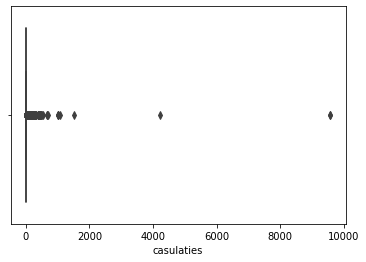

In [ ]:
#outliers
import seaborn as sns
sns.boxplot(x=GT['casulaties'])

In [ ]:
# calculate interquartile range
q25, q75 = np.percentile(GT['casulaties'], 25), np.percentile(GT['casulaties'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
for x in GT['casulaties']:
  if(x<lower or x>upper):
    GT.drop(GT.loc[(GT.casulaties)==x].index, inplace=True, axis=0)

Percentiles: 25th=0.000, 75th=5.000, IQR=5.000


In [ ]:
GT.shape

(14640, 25)

In [ ]:
GT.success.value_counts()

1    14226
0      414
Name: success, dtype: int64

In [ ]:
target= GT.success
GT.drop('success', axis=1, inplace= True)
target

0        1
1        1
2        1
3        1
4        1
        ..
16772    1
16773    1
16774    1
16775    1
16776    1
Name: success, Length: 14640, dtype: int64

**ML MODEL DEVELOPMENT WITHOUT FEATURE SELECTION AND SMOTE**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(GT, target, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
lg = LogisticRegression()
lg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_lg = lg.predict(x_test) 

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
score_lg = accuracy_score(y_pred_lg,y_test)
score_lg

0.9702868852459017

In [ ]:
print("train score - " + str(lg.score(x_train, y_train)))
print("test score - " + str(lg.score(x_test, y_test)))

train score - 0.9720799180327869
test score - 0.9702868852459017


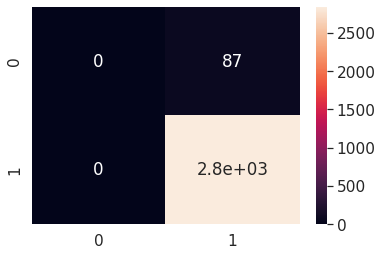

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,y_pred_lg)
sns.set(font_scale=1.4)
sns.heatmap(cm_lg, annot=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.97      1.00      0.98      2841

    accuracy                           0.97      2928
   macro avg       0.49      0.50      0.49      2928
weighted avg       0.94      0.97      0.96      2928



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ML MODEL DEVELOPMENT WITH FEATURE SELECTION**

(1) Low variance filter

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(GT)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
GT.columns[var_thres.get_support()]

Index(['iyear_sin', 'iyear_cos', 'imonth_sin', 'imonth_cos', 'nkill', 'nwound',
       'casulaties', 'extended', 'country_txt', 'region_txt', 'crit2', 'crit3',
       'multiple', 'vicinity', 'specificity', 'suicide', 'attacktype1_txt',
       'weaptype1_txt', 'targtype1_txt', 'gname', 'propextent_txt',
       'ishostkid', 'INT_ANY'],
      dtype='object')

In [ ]:
constant_columns = [column for column in GT.columns
                    if column not in GT.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [ ]:
for feature in constant_columns:
     print(feature)

crit1


In [ ]:
GT= GT.drop(constant_columns,axis=1)

(2) High correlation filter

In [ ]:
 GT1.corr()

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,nkill,nwound,casulaties
iyear_sin,1.000000,0.963642,0.007827,-0.013271,0.052817,0.017822,0.024091
iyear_cos,0.963642,1.000000,0.005302,-0.018387,0.055201,0.024010,0.029794
imonth_sin,0.007827,0.005302,1.000000,0.021238,-0.016187,-0.015842,-0.016282
imonth_cos,-0.013271,-0.018387,0.021238,1.000000,-0.009149,-0.002868,-0.003985
nkill,0.052817,0.055201,-0.016187,-0.009149,1.000000,0.828968,0.877537
nwound,0.017822,0.024010,-0.015842,-0.002868,0.828968,1.000000,0.995638
casulaties,0.024091,0.029794,-0.016282,-0.003985,0.877537,0.995638,1.000000


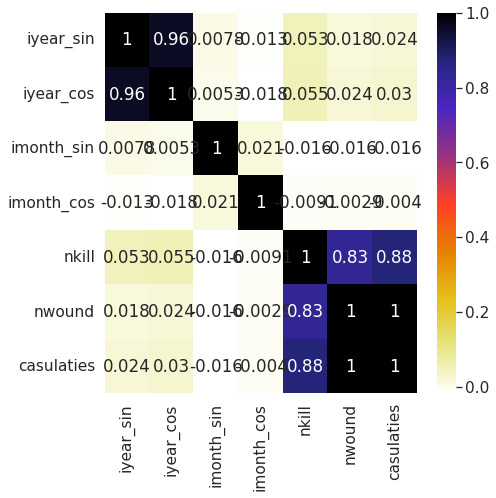

In [ ]:
plt.figure(figsize=(7,7))
cor =GT1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = []  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.append([colname,corr_matrix.columns[j]])
    return col_corr

In [ ]:
corr_features = correlation(GT1, 0.8)
len(corr_features)

4

In [ ]:
corr_features

[['iyear_cos', 'iyear_sin'],
 ['nwound', 'nkill'],
 ['casulaties', 'nkill'],
 ['casulaties', 'nwound']]

In [ ]:
GT= GT.drop(['nwound','nkill'], axis=1)

(3) Chi square test

In [ ]:
GT2= GT[['extended', 'country_txt', 'region_txt', 'crit2', 'crit3', 'multiple', 'vicinity', 'specificity', 'suicide',
       'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'gname', 'propextent_txt', 'ishostkid', 'INT_ANY']]

In [ ]:
GT2

,extended,country_txt,region_txt,crit2,crit3,multiple,vicinity,specificity,suicide,attacktype1_txt,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,INT_ANY
0,0,123,6,1,1,0.0,0,1.0,0,3,3,9,718,2,0.0,0
1,0,123,6,1,1,0.0,0,1.0,0,3,3,6,718,2,0.0,0
2,0,124,7,1,1,0.0,0,1.0,0,0,2,3,1053,2,0.0,0
3,0,123,6,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
4,0,123,6,1,1,1.0,0,1.0,0,2,1,2,168,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,0,61,10,1,1,1.0,0,1.0,0,3,2,2,70,2,0.0,1
16773,0,49,8,1,1,0.0,0,1.0,0,3,2,2,290,2,0.0,0
16774,0,0,8,1,1,0.0,0,3.0,0,2,1,11,996,2,0.0,0
16775,0,92,9,1,1,0.0,0,2.0,0,3,2,12,208,2,0.0,0


In [ ]:
target.shape

(14640,)

In [ ]:
from sklearn.feature_selection import chi2
f_p_values= chi2(GT2,target)

In [ ]:
f_p_values

(array([4.62302686e+00, 4.92754250e+01, 1.14699950e+01, 7.95235548e-06,
        1.98795306e-06, 6.04375435e+01, 4.86155311e-01, 1.72947445e+00,
        1.74338265e+01, 7.97739094e+01, 1.99010202e+01, 9.87249583e+01,
        2.66908071e-01, 1.02792188e-01, 1.17250588e+01, 5.25044448e-01]),
 array([3.15455245e-02, 2.22431640e-12, 7.07288693e-04, 9.97749975e-01,
        9.98875025e-01, 7.59504716e-15, 4.85647363e-01, 1.88478030e-01,
        2.97484607e-05, 4.19799716e-19, 8.15567928e-06, 2.90122519e-23,
        6.05413446e-01, 7.48504284e-01, 6.16640999e-04, 4.68697760e-01]))

In [ ]:
p_values=pd.Series(f_p_values[1])
p_values.index=GT2.columns
p_values

extended           3.154552e-02
country_txt        2.224316e-12
region_txt         7.072887e-04
crit2              9.977500e-01
crit3              9.988750e-01
multiple           7.595047e-15
vicinity           4.856474e-01
specificity        1.884780e-01
suicide            2.974846e-05
attacktype1_txt    4.197997e-19
weaptype1_txt      8.155679e-06
targtype1_txt      2.901225e-23
gname              6.054134e-01
propextent_txt     7.485043e-01
ishostkid          6.166410e-04
INT_ANY            4.686978e-01
dtype: float64

In [ ]:
p_values.sort_index(ascending=False)

weaptype1_txt      8.155679e-06
vicinity           4.856474e-01
targtype1_txt      2.901225e-23
suicide            2.974846e-05
specificity        1.884780e-01
region_txt         7.072887e-04
propextent_txt     7.485043e-01
multiple           7.595047e-15
ishostkid          6.166410e-04
gname              6.054134e-01
extended           3.154552e-02
crit3              9.988750e-01
crit2              9.977500e-01
country_txt        2.224316e-12
attacktype1_txt    4.197997e-19
INT_ANY            4.686978e-01
dtype: float64

In [ ]:
GT.drop(['INT_ANY','attacktype1_txt','country_txt','crit2','crit3','extended'], inplace= True, axis=1)

In [ ]:
GT['success']= target

In [ ]:
GT= GT.drop('success', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(GT, target, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
lg = LogisticRegression()
lg.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_lg = lg.predict(x_test) 

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
score_lg = accuracy_score(y_pred_lg,y_test)
score_lg

0.9658469945355191

In [ ]:
print("train score - " + str(lg.score(x_train, y_train)))
print("test score - " + str(lg.score(x_test, y_test)))

train score - 0.9731898907103825
test score - 0.9658469945355191


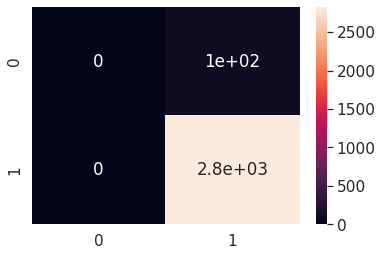

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,y_pred_lg)
sns.set(font_scale=1.4)
sns.heatmap(cm_lg, annot=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.97      1.00      0.98      2828

    accuracy                           0.97      2928
   macro avg       0.48      0.50      0.49      2928
weighted avg       0.93      0.97      0.95      2928



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OBSERVATION: Though accuracy is 0.97, precision and recall is biased towards the majority class. 

**APPLYING SMOTE TO THE UNBALANCED DATASET AND COMPARING THE MODEL PERFORMANCE**

In [ ]:
pip install imbalanced-learn

In [ ]:
GT

,iyear_sin,iyear_cos,imonth_sin,imonth_cos,casulaties,region_txt,multiple,vicinity,specificity,suicide,weaptype1_txt,targtype1_txt,gname,propextent_txt,ishostkid,success
0,-0.146,0.989,0.500,0.866,0.0,6,0.0,0,1.0,0,3,9,718,2,0.0,1
1,-0.146,0.989,0.500,0.866,0.0,6,0.0,0,1.0,0,3,6,718,2,0.0,1
2,-0.146,0.989,0.500,0.866,0.0,7,0.0,0,1.0,0,2,3,1053,2,0.0,1
3,-0.146,0.989,0.866,0.500,0.0,6,1.0,0,1.0,0,1,2,168,2,0.0,1
4,-0.146,0.989,0.866,0.500,0.0,6,1.0,0,1.0,0,1,2,168,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,-0.000,1.000,-0.000,1.000,0.0,10,1.0,0,1.0,0,2,2,70,2,0.0,1
16773,-0.000,1.000,-0.000,1.000,0.0,8,0.0,0,1.0,0,2,2,290,2,0.0,1
16774,-0.000,1.000,-0.000,1.000,5.0,8,0.0,0,3.0,0,1,11,996,2,0.0,1
16775,-0.000,1.000,-0.000,1.000,0.0,9,0.0,0,2.0,0,2,12,208,2,0.0,1


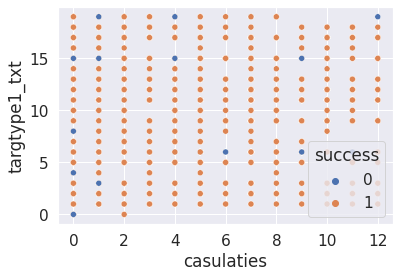

In [ ]:
sns.scatterplot(data= GT, x= GT.casulaties,
                    y= GT.targtype1_txt,
                    hue= GT.success)

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where

OVERSAMPLING TECHNIQUE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 11398
Before OverSampling, counts of label '0': 314 

After OverSampling, the shape of train_X: (22796, 15)
After OverSampling, the shape of train_y: (22796,) 

After OverSampling, counts of label '1': 11398
After OverSampling, counts of label '0': 11398


In [ ]:
x_train_res['success']= y_train_res

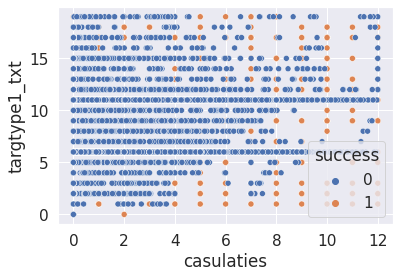

In [ ]:
sns.scatterplot(x= x_train_res.casulaties,
                    y= x_train_res.targtype1_txt,
                    hue= x_train_res.success)

In [ ]:
x_train_res.drop('success',axis=1, inplace=True)

In [ ]:
lr1 = LogisticRegression()
lr1.fit(x_train_res, y_train_res.ravel())
predictions = lr1.predict(x_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.05      0.59      0.10       100
           1       0.98      0.63      0.76      2828

    accuracy                           0.63      2928
   macro avg       0.52      0.61      0.43      2928
weighted avg       0.95      0.63      0.74      2928



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


UNDERSAMPLING TECHNIQUE

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
X_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 11398
Before Undersampling, counts of label '0': 314 

After Undersampling, the shape of train_X: (628, 15)
After Undersampling, the shape of train_y: (628,) 

After Undersampling, counts of label '1': 314
After Undersampling, counts of label '0': 314


In [ ]:
X_train_miss['success']= y_train_miss

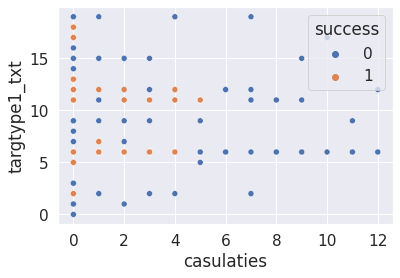

In [ ]:
sns.scatterplot(x= X_train_miss.casulaties,
                    y= X_train_miss.targtype1_txt,
                    hue= X_train_miss.success)

In [ ]:
X_train_miss.drop('success',axis=1, inplace=True)

In [ ]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(x_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.04      0.74      0.07       100
           1       0.97      0.30      0.46      2828

    accuracy                           0.32      2928
   macro avg       0.50      0.52      0.26      2928
weighted avg       0.94      0.32      0.45      2928



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


OBSERVATION: After sampling (oversampling and undersampling), it is noted that the accuracy has drastically reduced but there is a increase in precision and recall. 

ORDER OF THE MODEL BASED ON THER PERFORMANCE: 

1.   ML model with feature selection and without smote works well comparitively.

